                                                name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     author  user_rating  reviews  price  year        genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  

Розмір датасету: (550, 7)
У датасеті дані о Топ-50 рейтингом книг, що найбільше продаються на Amazon за 11 років (з 2009 по 2019)

name           0
author         0
user_rating    0
reviews     

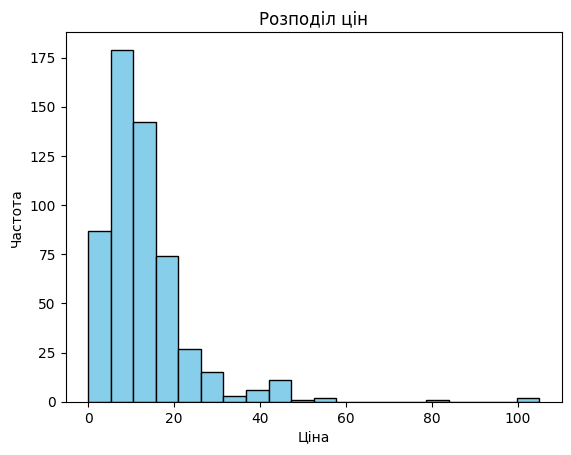

Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0

Найбільший рейтинг: 4.9
Кількість книг з максимальним рейтингом: 52

Найбільша кількість відгуків: Where the Crawdads Sing

Найдорожча книга: Diagnostic and Statistical Manual of Mental Disorders, 5th Edition: DSM-5

Кількість книг жанру Fiction, що потрапили до Топ-50 у 2010 році: 20

Кількість книг з рейтингом 4.9, що потрапили до рейтингу у 2010 та 2011 роках: 1

Остання книга у відсортованому списку: Publication Manual of the American Psychological Association, 6th Edition

Максимальна ціна для жанру Fiction: 82
Мінімальна ціна для жанру Fiction: 0
Максимальна ціна для жанру Non Fiction: 105
Мінімальна ціна для жанру Non Fiction: 0

Розмір таблиці: (248, 1)
Автор з найбільшою кількістю книг: Jeff Kinney
Кількість книг цього автора: 12

Автор з найменшим середнім рейтингом: Donna Tartt
Середній рейтинг цього автора: 3.9

Початковий розмір датафрейму: (248, 2)
Перший автор у відсортованому списку: Muriel

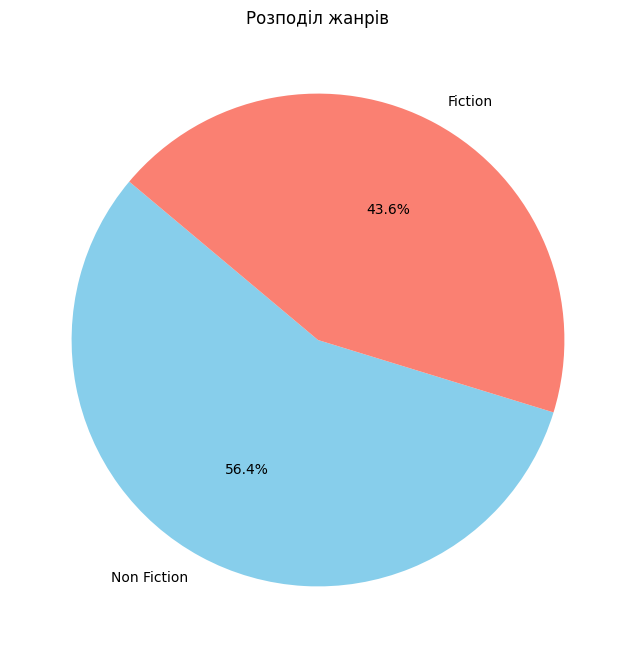

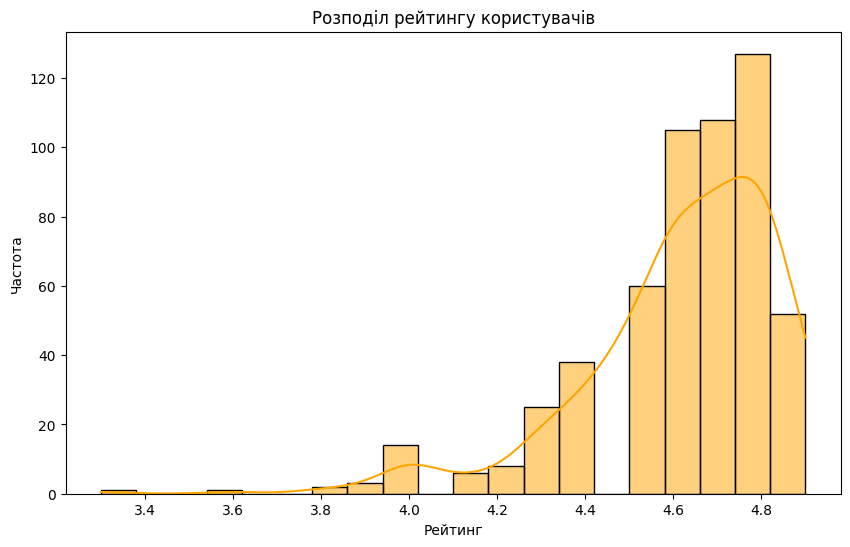

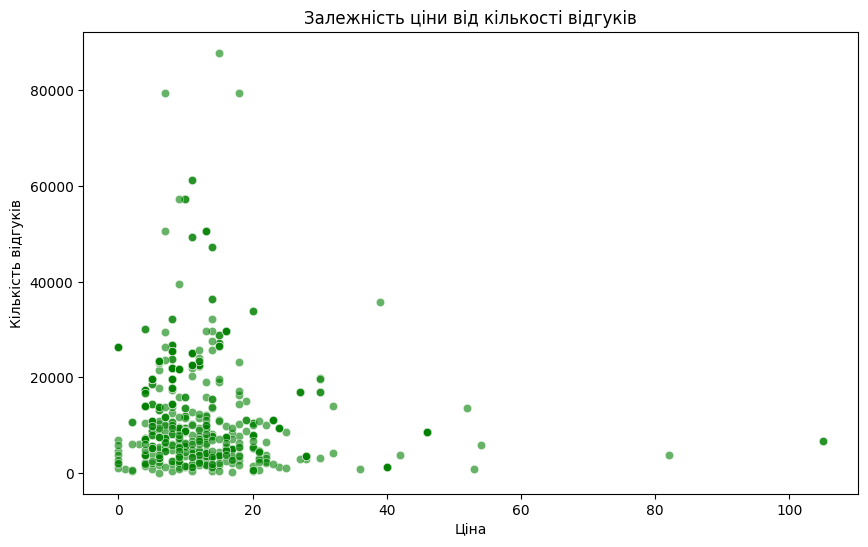

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("bestsellers with categories.csv")
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

print(df.head())
print("\nРозмір датасету:", df.shape)
print('У датасеті дані о Топ-50 рейтингом книг, що найбільше продаються на Amazon за 11 років (з 2009 по 2019)\n')

count = df.isna().sum()
print(count)
print('У змінних пропусків немає\n')

unique_genres = df['genre'].unique()
print(f'Уникальные жанры: {unique_genres}\n')

plt.hist(df['price'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Ціна')
plt.ylabel('Частота')
plt.title('Розподіл цін')
plt.show()
max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()
print("Максимальна ціна:", max_price)
print("Мінімальна ціна:", min_price)
print("Середня ціна:", mean_price)
print("Медіанна ціна:", median_price)

max_rating = df['user_rating'].max()
print("\nНайбільший рейтинг:", max_rating)

books_with_max_rating = df[df['user_rating'] == max_rating]
print("Кількість книг з максимальним рейтингом:", len(books_with_max_rating))

max_reviews_index = df['reviews'].idxmax()
book_with_max_reviews = df.loc[max_reviews_index]
book_name_with_max_reviews = book_with_max_reviews['name']
print(f'\nНайбільша кількість відгуків: {book_name_with_max_reviews}')

max_price_book_index = df['price'].idxmax()
max_price_book = df.loc[max_price_book_index]
max_price_book_name = max_price_book['name']
print(f'\nНайдорожча книга: {max_price_book_name}')

fiction_books_2010 = df[(df['genre'] == 'Fiction') & (df['year'] == 2010)]
count_fiction_books_2010 = len(fiction_books_2010)
print(f"\nКількість книг жанру Fiction, що потрапили до Топ-50 у 2010 році: {count_fiction_books_2010}")

books_with_rating_4_9 = df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))]
count_books_with_rating_4_9 = len(books_with_rating_4_9)
print("\nКількість книг з рейтингом 4.9, що потрапили до рейтингу у 2010 та 2011 роках:", count_books_with_rating_4_9)

sorted_books_2015 = df[(df['year'] == 2015) & (df['price'] <= 351)].sort_values(by='price')
last_book = sorted_books_2015.iloc[-1]
last_book_name = last_book['name']
print(f'\nОстання книга у відсортованому списку: {last_book_name}')


genre_prices = df.groupby('genre')['price'].agg(['max', 'min'])
print("\nМаксимальна ціна для жанру Fiction:", genre_prices.loc['Fiction', 'max'])
print("Мінімальна ціна для жанру Fiction:", genre_prices.loc['Fiction', 'min'])
print("Максимальна ціна для жанру Non Fiction:", genre_prices.loc['Non Fiction', 'max'])
print("Мінімальна ціна для жанру Non Fiction:", genre_prices.loc['Non Fiction', 'min'])


books_per_author = df.groupby('author').agg({'name': 'count'})
print("\nРозмір таблиці:", books_per_author.shape)
max_books_author = books_per_author.idxmax()[0]
print("Автор з найбільшою кількістю книг:", max_books_author)
print("Кількість книг цього автора:", books_per_author.loc[max_books_author].values[0])


average_rating_per_author = df.groupby('author').agg({'user_rating': 'mean'})
min_rating_author = average_rating_per_author.idxmin()[0]
print("\nАвтор з найменшим середнім рейтингом:", min_rating_author)
print("Середній рейтинг цього автора:", average_rating_per_author.loc[min_rating_author].values[0])


combined_df = pd.concat([books_per_author, average_rating_per_author], axis=1)
print("\nПочатковий розмір датафрейму:", combined_df.shape)
sorted_df = combined_df.sort_values(by=['name', 'user_rating'])
print("Перший автор у відсортованому списку:", sorted_df.index[0])

plt.figure(figsize=(8, 8))
df['genre'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=140)
plt.title('Розподіл жанрів')
plt.ylabel('')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['user_rating'], bins=20, kde=True, color='orange')
plt.title('Розподіл рейтингу користувачів')
plt.xlabel('Рейтинг')
plt.ylabel('Частота')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='reviews', data=df, color='green', alpha=0.6)
plt.title('Залежність ціни від кількості відгуків')
plt.xlabel('Ціна')
plt.ylabel('Кількість відгуків')
plt.show()
